In [22]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import pywt
from google.colab import drive

In [23]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
img = cv2.imread("/content/drive/MyDrive/Images/5/Lena.bmp", 0)

In [25]:
def perform_formula(coefficient):
  sigma = 2
  R, C = coefficient.shape
  quantized_coefficient = np.zeros_like(coefficient)

  for r in range(R):
    for c in range(C):
      quantized_coefficient[r][c] = (sigma * np.sign(coefficient[r][c]) * math.floor(np.abs(coefficient[r][c]) / sigma))
  return quantized_coefficient

In [37]:
def quantize_coefficients(levels, level_count):
  quantized_coefficients = [None] * (level_count + 1)
  quantized_coefficients[0] = levels[0]

  for resolution_level in range(-1, -1 * level_count - 1, -1):
    (HL, HH, LH) = levels[resolution_level]

    quantized_HL = perform_formula(HL)
    quantized_HH = perform_formula(HH)
    quantized_LH = perform_formula(LH)

    quantized_coefficients[resolution_level] = [quantized_HL, quantized_HH, quantized_LH]
  
  return quantized_coefficients

Text(0.5, 1.0, 'Image: Quantized')

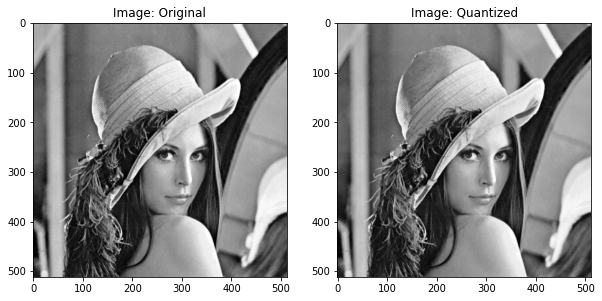

In [38]:
levels = pywt.wavedec2(img, 'haar', mode='periodization', level=3)
quantized_levels = quantize_coefficients(levels, 3)
quantized_image = np.uint8(pywt.waverec2(quantized_levels, 'haar', mode='periodization'))

fig, plot = plt.subplots(1, 2, figsize = (10, 5))

plot[0].imshow(img, cmap='gray')
plot[0].set_title("Image: Original")

plot[1].imshow(quantized_image, cmap='gray')
plot[1].set_title("Image: Quantized")

In [27]:
def psnr(original, contrast):
  mse = np.mean((original - contrast) ** 2)

  if mse == 0:
    return 100
  PIXEL_MAX = 255.0
  
  PSNR = 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

  return PSNR

In [39]:
print("PSNR Between Original and Quatized Images:")
print(psnr(img, quantized_image))

PSNR Between Original and Quatized Images:
46.77140814293079
